<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/stochastic_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


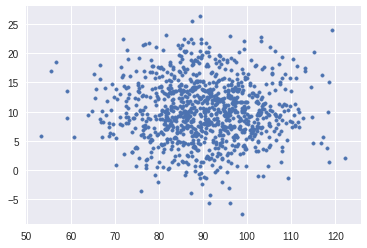

In [0]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Сколько элементов в каждом значении (histogram)

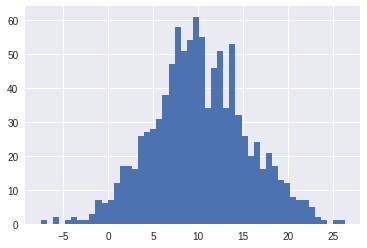

In [0]:
plt.hist(y,50)
plt.show()

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [0]:
norm_rv1.cdf(3)

1.659420869964764e-18

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [0]:
norm_rv.pdf(3)

1.4622963575006582e-18

Построим график функции плотности вероятности:

Text(0.5, 0, '$x$')

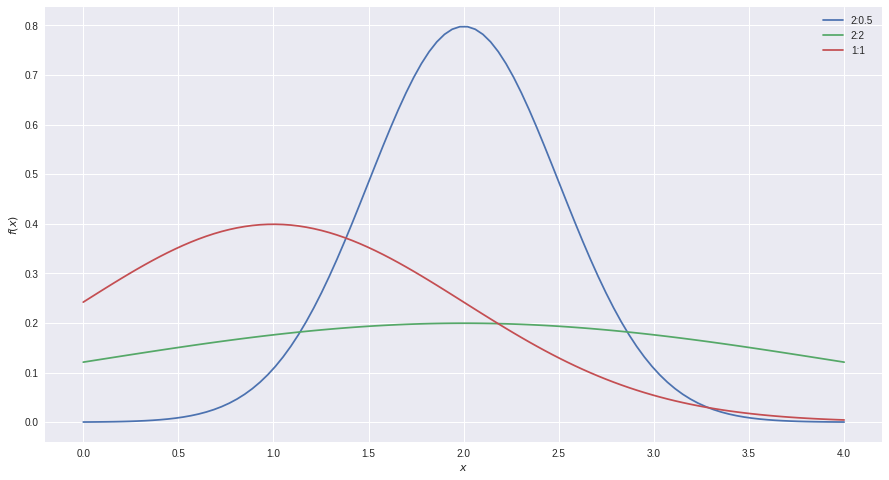

In [0]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(15,8))
plt.plot(x, pdf)
# plt.plot(x, pdf2)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['2:0.5',  '2:2', '1:1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

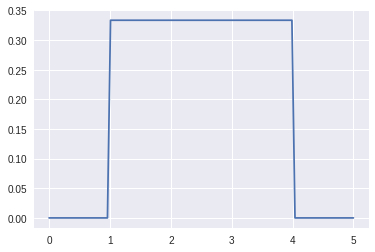

In [0]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

Количество измерений по отрезками:

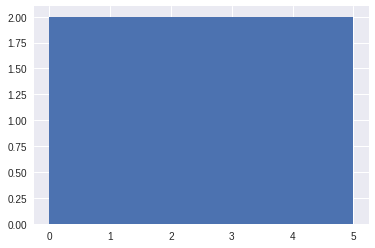

In [0]:
plt.hist(x,50)
plt.show()

# Центральная предельная теорема

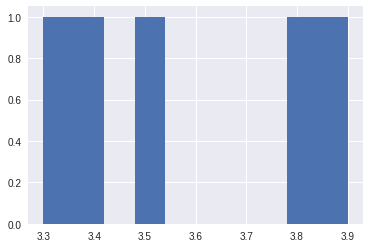

In [0]:
from numpy.random import randint

sampleMeans = []

for _ in range(5):
  # 50 элементов, значение которых от 1 до 7
    sampleMean = np.mean(randint(1, 7, 50))
    sampleMeans.append(sampleMean)

# если построим график - можно увидеть нормальное распределение
plt.hist(sampleMeans)
plt.show()

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [0]:
bernoulli_rv = sts.bernoulli(0.7)

b  =bernoulli_rv.rvs(300)
b[:10]

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [0]:
print(abs(np.sum(b) - 300 * 0.7) / 300)

0.016666666666666666


# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [0]:
binomial_rv = sts.binom(20, 0.9)
binomial_rv.rvs(10)

array([17, 19, 19, 18, 18, 18, 18, 20, 18, 18])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

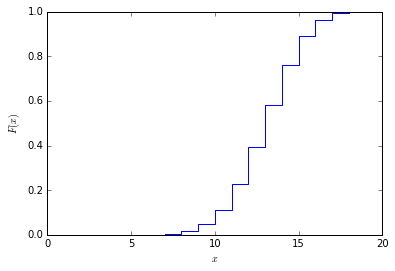

In [0]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

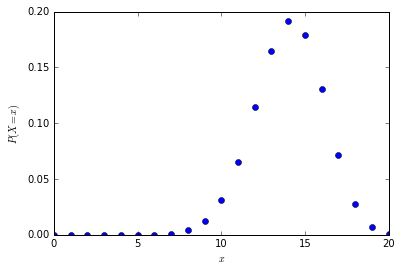

In [0]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

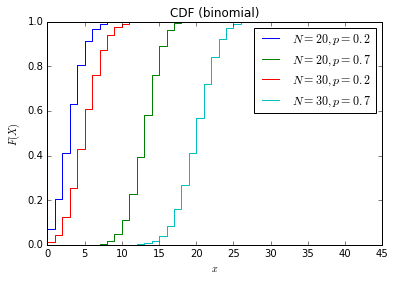

In [0]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html